<a href="https://colab.research.google.com/github/TG5128/MachineLearning/blob/main/cyclistic_bike_share_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

This is a capstone project as a part of my [Google Data Analytics Professional Certificate](https://www.coursera.org/professional-certificates/google-data-analytics) course.

**For this project following data analysis steps will be followed :**

 * Ask
 * Prepare
 * Process
 * Analyze
 * Share
 * Act

**Following Case Study Roadmap will be followed on each data analysis process**

 * Code, when needed on the step.
 * Key tasks, as a checklist.
 * Deliverable, as a checklist.

## Scenario

You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, your team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve your recommendations, so they must be backed up with compelling data insights and professional data visualizations.


## Ask

Three questions will guide the future marketing program:
1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

The director of marketing and your manager *Lily Moreno* has assigned you the first question to answer: *How do annual members and casual riders use Cyclistic bikes differently?*

#### Key tasks

- Identify the business task

    * The main objective is to build the best marketing strategies to turn casual bike riders into annual members by analyzing how the 'Casual' and 'Annual' customers use Cyclistic bike share differently.


- Consider key stakeholders

    * Cyclistic executive team, Director of Marketing (Lily Moreno), Marketing Analytics team.


#### Deliverable

-  A clear statement of the business task

    * Find the differences between casual and member riders.


## Prepare

I will use Cyclistic’s historical trip data to analyze and identify trends. The data has been made available by
**Motivate International Inc.** under this [license](https://www.divvybikes.com/data-license-agreement).
Datasets are avilable [here](https://divvy-tripdata.s3.amazonaws.com/index.html).

#### Key tasks

- Download data and store it appropriately.

    * Data has been downloaded from [here](https://divvy-tripdata.s3.amazonaws.com/index.html) and copies have been stored securely on my computer and here on Kaggle.


-  Identify how it’s organized.

    * All trip data is in comma-delimited (.CSV) format. Column names "ride_id", "rideable_type", "started_at", "ended_at", "start_station_name", "start_station_id", "end_station_name", "end_station_id", "start_lat", "start_lng", "end_lat", "end_lng", "member_casual" (Total 13 column)


-  Sort and filter the data.

    * For this analysis I'm going to use last 12 months data of the year 2021, as it's the more current period to the business task.


- Determine the credibility of the data.

    * For the purposes of this case study, the datasets are appropriate and it will enable me to answer the business questions. But due data-privacy I cannot use rider's personally identification information, and this will prevent me from determining if a single user/rider taken several rides. All ride ids are unique in this data-set.


#### Deliverable

-  A description of all data sources used

    * Main source of data provided by the [Cylistic company](https://divvy-tripdata.s3.amazonaws.com/index.html).


#### Collect and combine data into a single data frame (Code)

In [17]:
install.packages("janitor")
install.packages("ggmap")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [18]:

## install and load necessary packages
library(tidyverse)
library(janitor)
library(ggmap)
library(geosphere)
library(lubridate)


In [19]:
## import data in R studio
jan21 <- read_csv("../input/divvytripdata/202101-divvy-tripdata.csv")
feb21 <- read_csv("../input/divvytripdata/202102-divvy-tripdata.csv")
mar21 <- read_csv("../input/divvytripdata/202103-divvy-tripdata.csv")
apr21 <- read_csv("../input/divvytripdata/202104-divvy-tripdata.csv")
may21 <- read_csv("../input/divvytripdata/202105-divvy-tripdata.csv")
jun21 <- read_csv("../input/divvytripdata/202106-divvy-tripdata.csv")
jul21 <- read_csv("../input/divvytripdata/202107-divvy-tripdata.csv")
aug21 <- read_csv("../input/divvytripdata/202108-divvy-tripdata.csv")
sep21 <- read_csv("../input/divvytripdata/202109-divvy-tripdata.csv")
oct21 <- read_csv("../input/divvytripdata/202110-divvy-tripdata.csv")
nov21 <- read_csv("../input/divvytripdata/202111-divvy-tripdata.csv")
dec21 <- read_csv("../input/divvytripdata/202112-divvy-tripdata.csv")

Rows: 96834 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 49622 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 228496 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7):

In [20]:
## checking data sets for consistency
colnames(jan21)
colnames(feb21)
colnames(mar21)
colnames(apr21)
colnames(may21)
colnames(jun21)
colnames(jul21)
colnames(aug21)
colnames(sep21)
colnames(oct21)
colnames(nov21)
colnames(dec21)

## to check data structures (dbl, chr, date)
str(jan21)
str(feb21)
str(mar21)
str(apr21)
str(may21)
str(jun21)
str(jul21)
str(aug21)
str(sep21)
str(oct21)
str(nov21)
str(dec21)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

spc_tbl_ [96,834 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:96834] "E19E6F1B8D4C42ED" "DC88F20C2C55F27F" "EC45C94683FE3F27" "4FA453A75AE377DB" ...
 $ rideable_type     : chr [1:96834] "electric_bike" "electric_bike" "electric_bike" "electric_bike" ...
 $ started_at        : POSIXct[1:96834], format: "2021-01-23 16:14:19" "2021-01-27 18:43:08" ...
 $ ended_at          : POSIXct[1:96834], format: "2021-01-23 16:24:44" "2021-01-27 18:47:12" ...
 $ start_station_name: chr [1:96834] "California Ave & Cortez St" "California Ave & Cortez St" "California Ave & Cortez St" "California Ave & Cortez St" ...
 $ start_station_id  : chr [1:96834] "17660" "17660" "17660" "17660" ...
 $ end_station_name  : chr [1:96834] NA NA NA NA ...
 $ end_station_id    : chr [1:96834] NA NA NA NA ...
 $ start_lat         : num [1:96834] 41.9 41.9 41.9 41.9 41.9 ...
 $ start_lng         : num [1:96834] -87.7 -87.7 -87.7 -87.7 -87.7 ...
 $ end_lat           : num [1:96834] 41.9 41.9 4

In [21]:
## merge individual monthly data frames into one large data frame
tripdata <- bind_rows(jan21, feb21, mar21, apr21, may21, jun21, jul21, aug21, sep21, oct21, nov21, dec21)

## Process

Cleaning and Preparation of data for analysis

#### Key tasks

- Check the data for errors.
- Choose your tools.
- Transform the data so you can work with it effectively.
- Document the cleaning process.

#### Deliverable

- Documentation of any cleaning or manipulation of data

#### Following code chunks will be used for this 'Process' phase.


In [22]:
## checking merged data frame
colnames(tripdata)  #List of column names
head(tripdata)  #See the first 6 rows of data frame.  Also tail(tripdata)
str(tripdata)  #See list of columns and data types (numeric, character, etc)
summary(tripdata)  #Statistical summary of data. Mainly for numeric.

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NA,NA,41.90034,-87.69674,41.89,-87.72,member
DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NA,NA,41.90033,-87.69671,41.90,-87.69,member
EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NA,NA,41.90031,-87.69664,41.90,-87.70,member
4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NA,NA,41.90040,-87.69666,41.92,-87.69,member
BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NA,NA,41.90033,-87.69670,41.90,-87.70,casual
5D8969F88C773979,electric_bike,2021-01-09 14:24:07,2021-01-09 15:17:54,California Ave & Cortez St,17660,NA,NA,41.90041,-87.69676,41.94,-87.71,casual


spc_tbl_ [5,595,063 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:5595063] "E19E6F1B8D4C42ED" "DC88F20C2C55F27F" "EC45C94683FE3F27" "4FA453A75AE377DB" ...
 $ rideable_type     : chr [1:5595063] "electric_bike" "electric_bike" "electric_bike" "electric_bike" ...
 $ started_at        : POSIXct[1:5595063], format: "2021-01-23 16:14:19" "2021-01-27 18:43:08" ...
 $ ended_at          : POSIXct[1:5595063], format: "2021-01-23 16:24:44" "2021-01-27 18:47:12" ...
 $ start_station_name: chr [1:5595063] "California Ave & Cortez St" "California Ave & Cortez St" "California Ave & Cortez St" "California Ave & Cortez St" ...
 $ start_station_id  : chr [1:5595063] "17660" "17660" "17660" "17660" ...
 $ end_station_name  : chr [1:5595063] NA NA NA NA ...
 $ end_station_id    : chr [1:5595063] NA NA NA NA ...
 $ start_lat         : num [1:5595063] 41.9 41.9 41.9 41.9 41.9 ...
 $ start_lng         : num [1:5595063] -87.7 -87.7 -87.7 -87.7 -87.7 ...
 $ end_lat           : nu

   ride_id          rideable_type        started_at                 
 Length:5595063     Length:5595063     Min.   :2021-01-01 00:02:05  
 Class :character   Class :character   1st Qu.:2021-06-06 23:52:40  
 Mode  :character   Mode  :character   Median :2021-08-01 01:52:11  
                                       Mean   :2021-07-29 07:41:02  
                                       3rd Qu.:2021-09-24 16:36:16  
                                       Max.   :2021-12-31 23:59:48  
                                                                    
    ended_at                   start_station_name start_station_id  
 Min.   :2021-01-01 00:08:39   Length:5595063     Length:5595063    
 1st Qu.:2021-06-07 00:44:21   Class :character   Class :character  
 Median :2021-08-01 02:21:55   Mode  :character   Mode  :character  
 Mean   :2021-07-29 08:02:58                                        
 3rd Qu.:2021-09-24 16:54:05                                        
 Max.   :2022-01-03 17:32:18      

In [23]:
## Adding date, month, year, day of week columns
tripdata <- tripdata %>%
  mutate(year = format(as.Date(started_at), "%Y")) %>% # extract year
  mutate(month = format(as.Date(started_at), "%B")) %>% #extract month
  mutate(date = format(as.Date(started_at), "%d")) %>% # extract date
  mutate(day_of_week = format(as.Date(started_at), "%A")) %>% # extract day of week
  mutate(ride_length = difftime(ended_at, started_at)) %>%
  mutate(start_time = strftime(started_at, "%H"))

# converting 'ride_length' to numeric for calculation on data

tripdata <- tripdata %>%
  mutate(ride_length = as.numeric(ride_length))
is.numeric(tripdata$ride_length) # to check it is right format

[1] TRUE

In [24]:
# adding ride distance in km
tripdata$ride_distance <- distGeo(matrix(c(tripdata$start_lng, tripdata$start_lat), ncol = 2), matrix(c(tripdata$end_lng, tripdata$end_lat), ncol = 2))

tripdata$ride_distance <- tripdata$ride_distance/1000 #distance in km

In [25]:
# Remove "bad" data
# The dataframe includes a few hundred entries when bikes were taken out of docks
# and checked for quality by Divvy where ride_length was negative or 'zero'
tripdata_clean <- tripdata[!(tripdata$ride_length <= 0),]

## Analyze

Now all the required information are in one place and ready for exploration.

#### Key tasks

-  Aggregate your data so it’s useful and accessible.
-  Organize and format your data.
-  Perform calculations.
-  Identify trends and relationships.

#### Deliverable

-  A summary of the analysis

#### Following code chunks will be used for this 'Analyze' phase

#### Compare members and casual users :

In [26]:
# first lets check the cleaned data frame
str(tripdata_clean)

tibble [5,594,410 × 20] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:5594410] "E19E6F1B8D4C42ED" "DC88F20C2C55F27F" "EC45C94683FE3F27" "4FA453A75AE377DB" ...
 $ rideable_type     : chr [1:5594410] "electric_bike" "electric_bike" "electric_bike" "electric_bike" ...
 $ started_at        : POSIXct[1:5594410], format: "2021-01-23 16:14:19" "2021-01-27 18:43:08" ...
 $ ended_at          : POSIXct[1:5594410], format: "2021-01-23 16:24:44" "2021-01-27 18:47:12" ...
 $ start_station_name: chr [1:5594410] "California Ave & Cortez St" "California Ave & Cortez St" "California Ave & Cortez St" "California Ave & Cortez St" ...
 $ start_station_id  : chr [1:5594410] "17660" "17660" "17660" "17660" ...
 $ end_station_name  : chr [1:5594410] NA NA NA NA ...
 $ end_station_id    : chr [1:5594410] NA NA NA NA ...
 $ start_lat         : num [1:5594410] 41.9 41.9 41.9 41.9 41.9 ...
 $ start_lng         : num [1:5594410] -87.7 -87.7 -87.7 -87.7 -87.7 ...
 $ end_lat           : num [1:5594410] 

In [27]:
# lets check summarised details about the cleaned dataset
summary(tripdata_clean)

   ride_id          rideable_type        started_at                 
 Length:5594410     Length:5594410     Min.   :2021-01-01 00:02:05  
 Class :character   Class :character   1st Qu.:2021-06-06 23:48:04  
 Mode  :character   Mode  :character   Median :2021-08-01 01:47:45  
                                       Mean   :2021-07-29 07:38:35  
                                       3rd Qu.:2021-09-24 16:34:56  
                                       Max.   :2021-12-31 23:59:48  
                                                                    
    ended_at                   start_station_name start_station_id  
 Min.   :2021-01-01 00:08:39   Length:5594410     Length:5594410    
 1st Qu.:2021-06-07 00:39:47   Class :character   Class :character  
 Median :2021-08-01 02:16:53   Mode  :character   Mode  :character  
 Mean   :2021-07-29 08:00:31                                        
 3rd Qu.:2021-09-24 16:52:38                                        
 Max.   :2022-01-03 17:32:18      

#### Conduct descriptive analysis :

In [28]:
## Conduct descriptive analysis
# descriptive analysis on 'ride_length'
# mean = straight average (total ride length / total rides)
# median = midpoint number of ride length array
# max = longest ride
# min = shortest ride

tripdata_clean %>%
  summarise(average_ride_length = mean(ride_length), median_length = median(ride_length),
            max_ride_length = max(ride_length), min_ride_length = min(ride_length))

average_ride_length,median_length,max_ride_length,min_ride_length
<dbl>,<dbl>,<dbl>,<dbl>
1316.299,720,3356649,1


 * This above data is about 'ride_length' depending on the whole year 2021. Minimum ride length (min_ride_length) and Maximum ride length (max_ride_length) has absurd values, due to the lack of scope it not possible to find out the problem behind it, but it need to be analyzed further.

#### Compare members and casual users

 * Members vs casual riders difference depending on total rides taken

member_casual,ride_count,ride_percentage
<chr>,<int>,<dbl>
casual,2528664,45.19983
member,3065746,54.80017


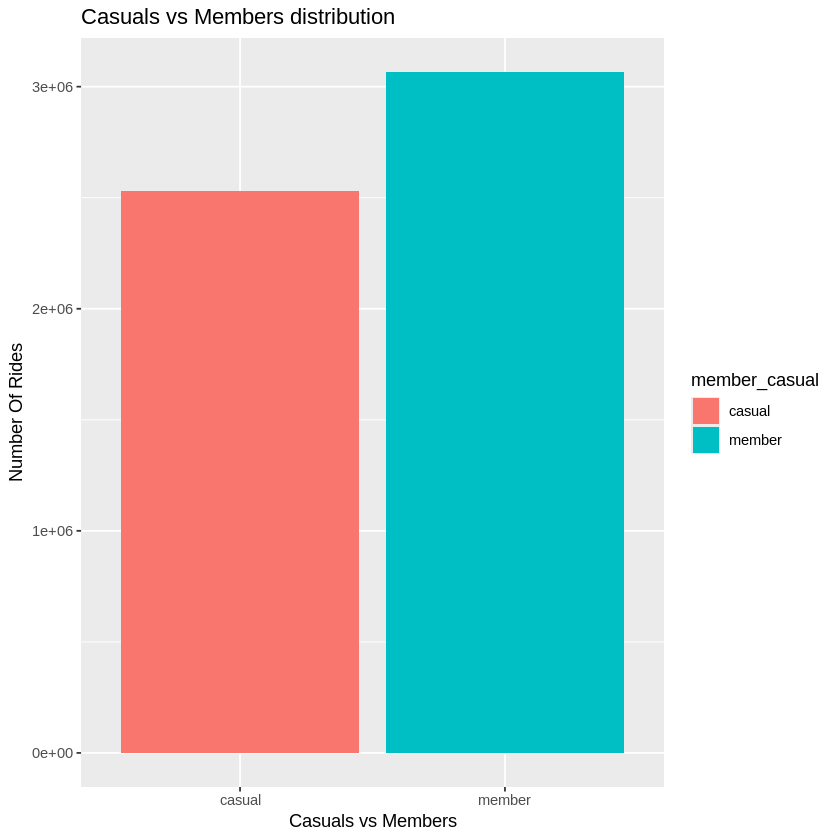

In [29]:
# members vs casual riders difference depending on total rides taken
tripdata_clean %>%
    group_by(member_casual) %>%
    summarise(ride_count = length(ride_id), ride_percentage = (length(ride_id) / nrow(tripdata_clean)) * 100)

ggplot(tripdata_clean, aes(x = member_casual, fill=member_casual)) +
    geom_bar() +
    labs(x="Casuals vs Members", y="Number Of Rides", title= "Casuals vs Members distribution")

* We can see on the Casuals vs Members distribution chart, members possesing ~55%, and casual riders have ~45% of the dataset. So it is clearly visible that in the whole year 2021 members used ride share ~10% more than casual riders.

#### Comparison between Members Causal riders depending on ride length (mean, median, minimum, maximum)

In [30]:
tripdata_clean %>%
  group_by(member_casual) %>%
  summarise(average_ride_length = mean(ride_length), median_length = median(ride_length),
            max_ride_length = max(ride_length), min_ride_length = min(ride_length))

member_casual,average_ride_length,median_length,max_ride_length,min_ride_length
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
casual,1920.3468,959,3356649,1
member,818.0727,576,93596,1


* From the above table we can conclude that casual riders took bike for longer rides than members, as the average trip duration / average ride length of member riders is lower than the average trip duration / average ride length of casual riders.


#### See total rides and average ride time by each day for members vs casual riders

In [31]:

# lets fix the days of the week order.
tripdata_clean$day_of_week <- ordered(tripdata_clean$day_of_week,
                                    levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

tripdata_clean %>%
  group_by(member_casual, day_of_week) %>%  #groups by member_casual
  summarise(number_of_rides = n() #calculates the number of rides and average duration
  ,average_ride_length = mean(ride_length),.groups="drop") %>% # calculates the average duration
  arrange(member_casual, day_of_week) #sort


member_casual,day_of_week,number_of_rides,average_ride_length
<chr>,<ord>,<int>,<dbl>
casual,Sunday,481048,2254.2573
casual,Monday,286340,1912.7473
casual,Tuesday,274357,1678.5293
casual,Wednesday,278910,1659.6644
casual,Thursday,286038,1662.3466
casual,Friday,364037,1821.1061
casual,Saturday,557934,2082.5980
member,Sunday,376086,939.5538
member,Monday,416181,794.8956


#### Visualize total rides data by type and day of week

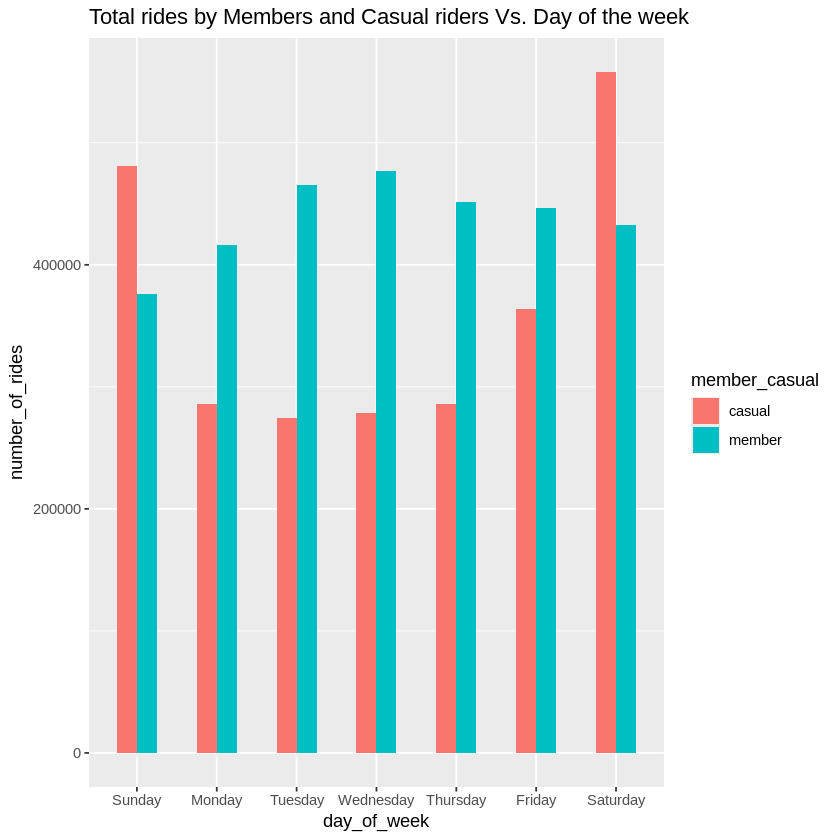

In [32]:
tripdata_clean %>%
  group_by(member_casual, day_of_week) %>%
  summarise(number_of_rides = n(), .groups="drop") %>%
  arrange(member_casual, day_of_week)  %>%
  ggplot(aes(x = day_of_week, y = number_of_rides, fill = member_casual)) +
  labs(title ="Total rides by Members and Casual riders Vs. Day of the week") +
  geom_col(width=0.5, position = position_dodge(width=0.5)) +
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE))


#### Visualize average ride time data by type and day of week

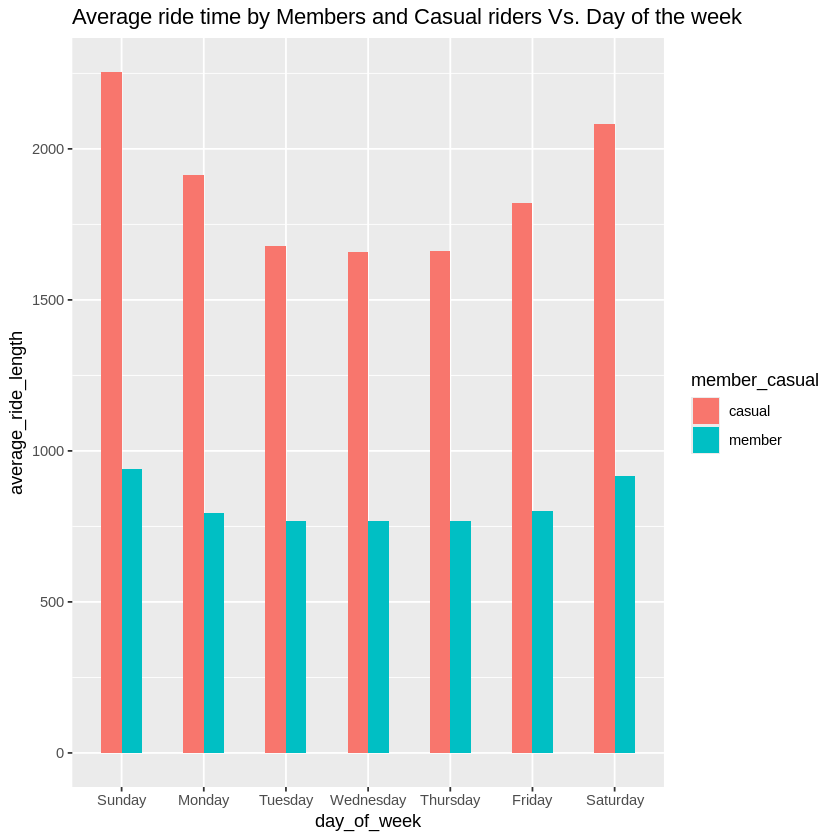

In [33]:
tripdata_clean %>%
  group_by(member_casual, day_of_week) %>%
  summarise(average_ride_length = mean(ride_length), .groups="drop") %>%
  ggplot(aes(x = day_of_week, y = average_ride_length, fill = member_casual)) +
  geom_col(width=0.5, position = position_dodge(width=0.5)) +
  labs(title ="Average ride time by Members and Casual riders Vs. Day of the week")


 * From the first chart above members took consistent trips throughout the week, but there is less rides in Sunday. For casual riders the most taken rides are in weekends, starting rise in Friday followed by Saturday and Sunday.

 * The average ride length for members are much much less than that of casual riders. Also it can be seen that weekend average ride length is much higher for casual riders along with total rides. So both of this facts can be correlated for casual riders. For members average ride lengh is about the same throughout the week (<1000 sec).

#### See total rides and average ride time by each month for members vs casual riders

In [34]:
# First lets fix the days of the week order.
tripdata_clean$month <- ordered(tripdata_clean$month,
                            levels=c("January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"))

tripdata_clean %>%
  group_by(member_casual, month) %>%
  summarise(number_of_rides = n(), average_ride_length = mean(ride_length), .groups="drop") %>%
  arrange(member_casual, month)

member_casual,month,number_of_rides,average_ride_length
<chr>,<ord>,<int>,<dbl>
casual,January,18117,1541.0754
casual,February,10130,2962.6862
casual,March,84028,2289.6601
casual,April,136590,2281.5631
casual,May,256888,2294.1080
casual,June,370636,2227.5568
casual,July,442011,1967.6107
casual,August,412608,1727.4469
casual,September,363840,1669.1291


#### Visualize total rides data by type and month

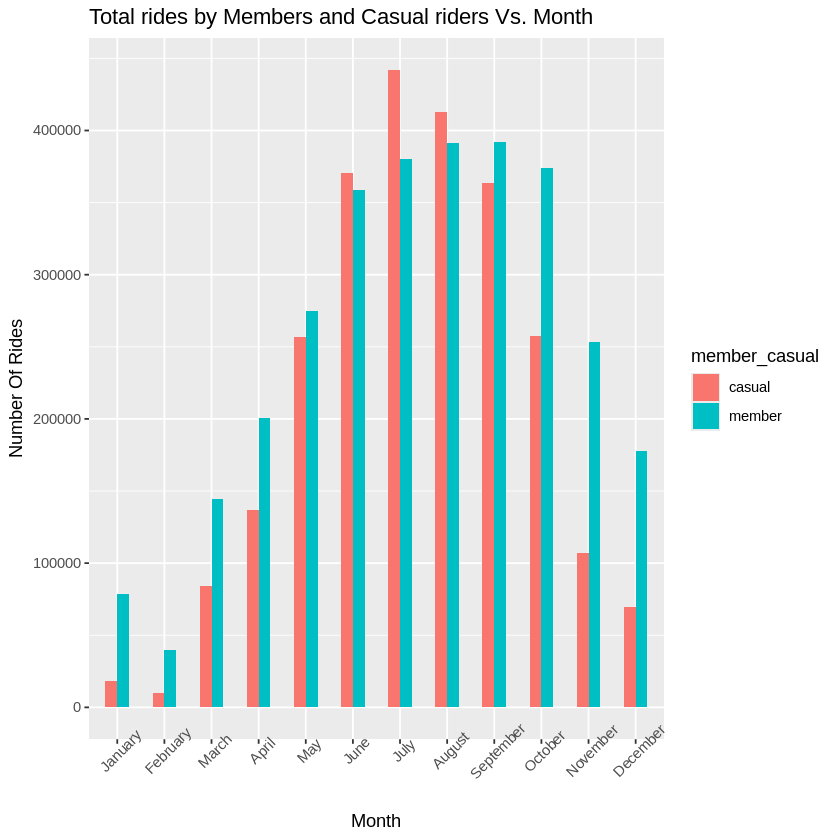

In [35]:
tripdata_clean %>%
  group_by(member_casual, month) %>%
  summarise(number_of_rides = n(),.groups="drop") %>%
  arrange(member_casual, month)  %>%
  ggplot(aes(x = month, y = number_of_rides, fill = member_casual)) +
  labs(title ="Total rides by Members and Casual riders Vs. Month", x = "Month", y= "Number Of Rides") +
  theme(axis.text.x = element_text(angle = 45)) +
  geom_col(width=0.5, position = position_dodge(width=0.5)) +
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE))

#### Visualize average ride time data by type and month

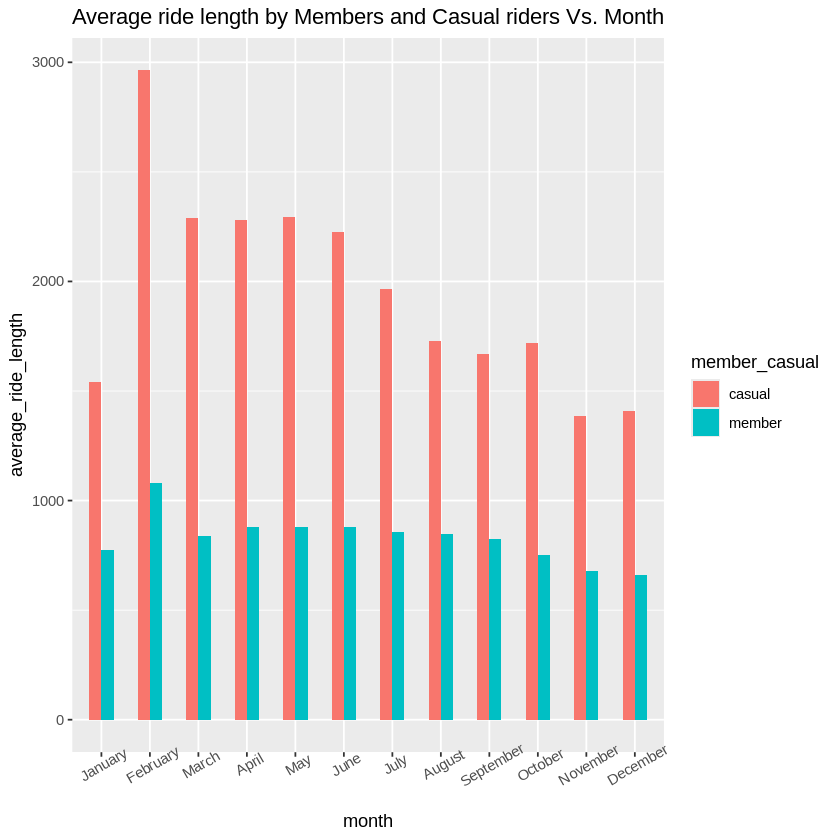

In [36]:
tripdata_clean %>%
  group_by(member_casual, month) %>%
  summarise(average_ride_length = mean(ride_length),.groups="drop") %>%
  ggplot(aes(x = month, y = average_ride_length, fill = member_casual)) +
  geom_col(width=0.5, position = position_dodge(width=0.5)) +
  labs(title ="Average ride length by Members and Casual riders Vs. Month") +
  theme(axis.text.x = element_text(angle = 30))

* The months June, July, August and September are the most busy time of the year among both members and casual riders. It is possible due to winter there is a significant drop in total rides in the months of November, December, January and February for both type of customers. But we can see that member's total rides are higher than casual riders throughout the year except from June, July and August.

* Average ride length of members is about the same <1000 secs throughout the year. While casual riders average ride length is between 1000 - 2000 secs throughout the year. But in the month of February average right length is higher but total rides are lowest as compared to other months.

#### Comparison between Members and Casual riders depending on ride distance

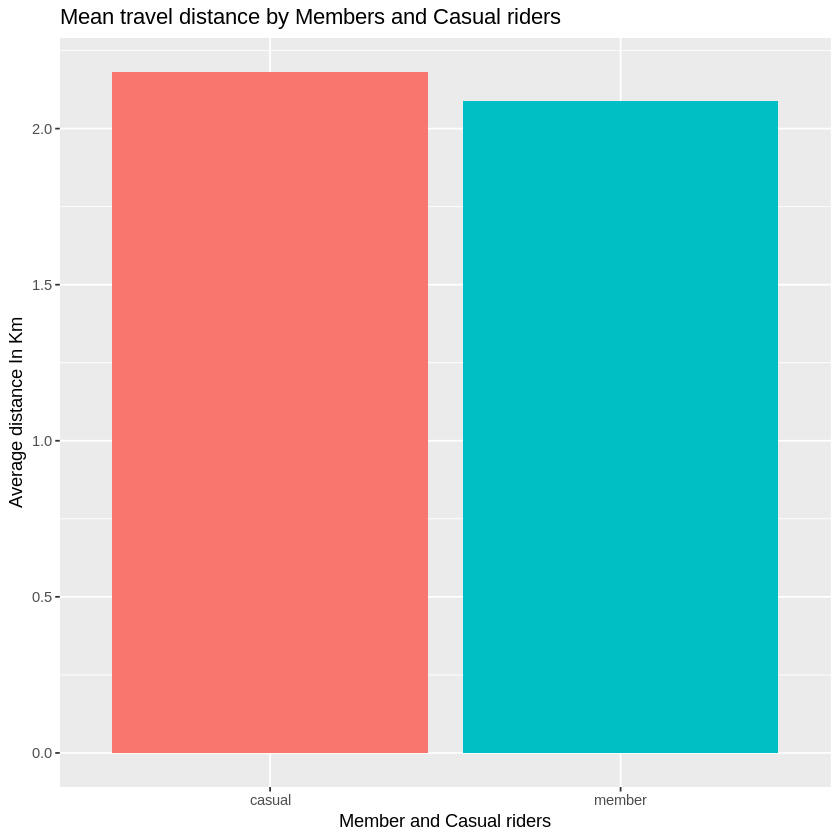

In [37]:
tripdata_clean %>%
  group_by(member_casual) %>% drop_na() %>%
  summarise(average_ride_distance = mean(ride_distance)) %>%
  ggplot() +
  geom_col(mapping= aes(x= member_casual,y= average_ride_distance,fill=member_casual), show.legend = FALSE)+
  labs(title = "Mean travel distance by Members and Casual riders", x="Member and Casual riders", y="Average distance In Km")


* From the above chart we can see that both riders travel about the same average distance. This similarity could be possible due to that member take (same ride time) rides throughout the week, but casual riders took rides mostly in weekends with higher ride time.

#### Analysis and visualization on cyclistic's bike demand by hour in a day

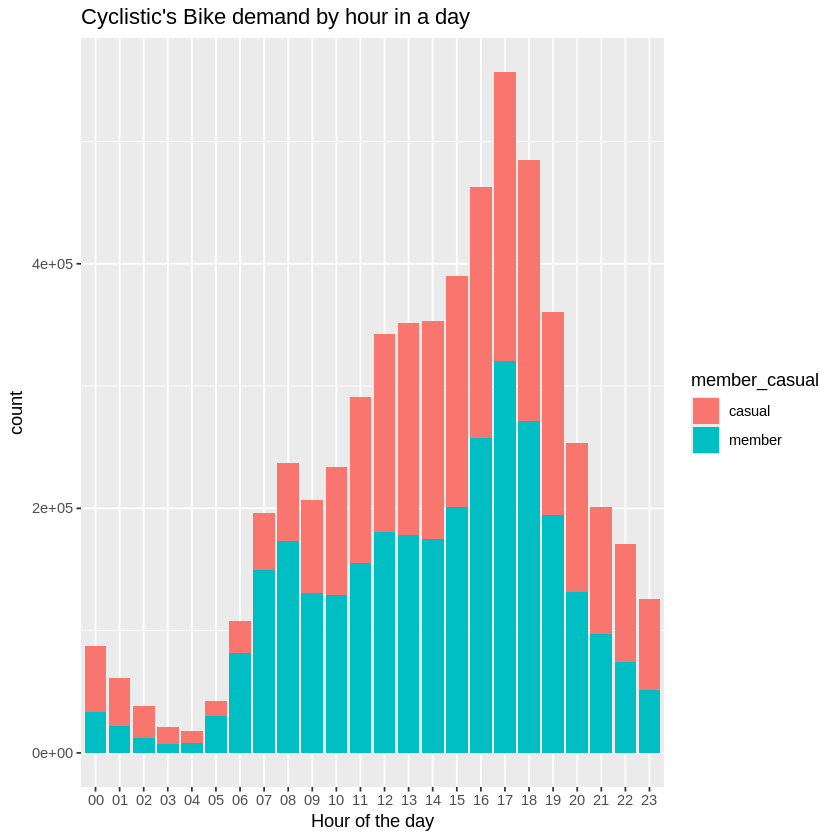

In [38]:
tripdata_clean %>%
    ggplot(aes(start_time, fill= member_casual)) +
    labs(x="Hour of the day", title="Cyclistic's Bike demand by hour in a day") +
    geom_bar()

* From the above chart we can see more members between 7am and 11am and more casual riders between 3pm and 12am. Also there is bigger volume rise in the afternoon for both type of riders. This information needs to be checked on day basis.

#### Analysis and visualization on cyclistic's bike demand per hour by day of the week

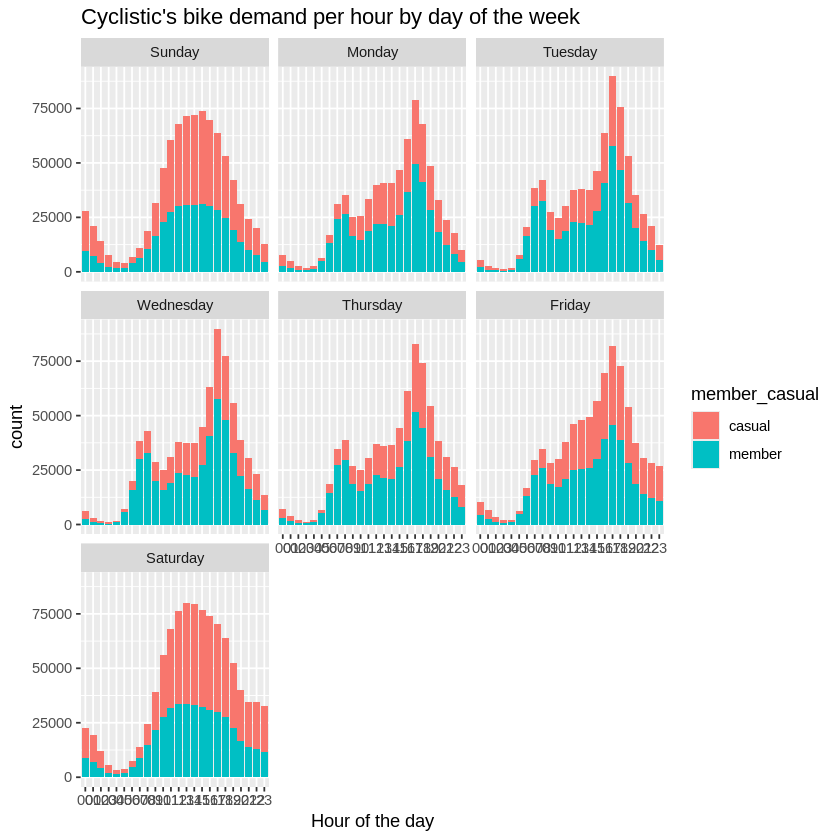

In [39]:
tripdata_clean %>%
    ggplot(aes(start_time, fill=member_casual)) +
    geom_bar() +
    labs(x="Hour of the day", title="Cyclistic's bike demand per hour by day of the week") +
    facet_wrap(~ day_of_week)

* There is a lot of diferrence between the weekdays and weekends. There is a big increase of volume in the weekdays between 7am to 10am and another volume increase from 5pm to 7pm. We can hypothesize that members use the bikes as daily routine like going to work (same behaviour throughout the weekdays) and go back from work (5pm - 7pm). Weekends are completely different for members and casual riders, Friday, Saturday and Sunday there is huge peak in volume for casual riders, from this we can hypothesize that casual riders mostly use bike share for leisure activity in the weekends.

#### Analysis and visualization of Rideable type Vs. total rides by Members and casual riders

rideable_type,count
<chr>,<int>
classic_bike,3250746
docked_bike,312335
electric_bike,2031329


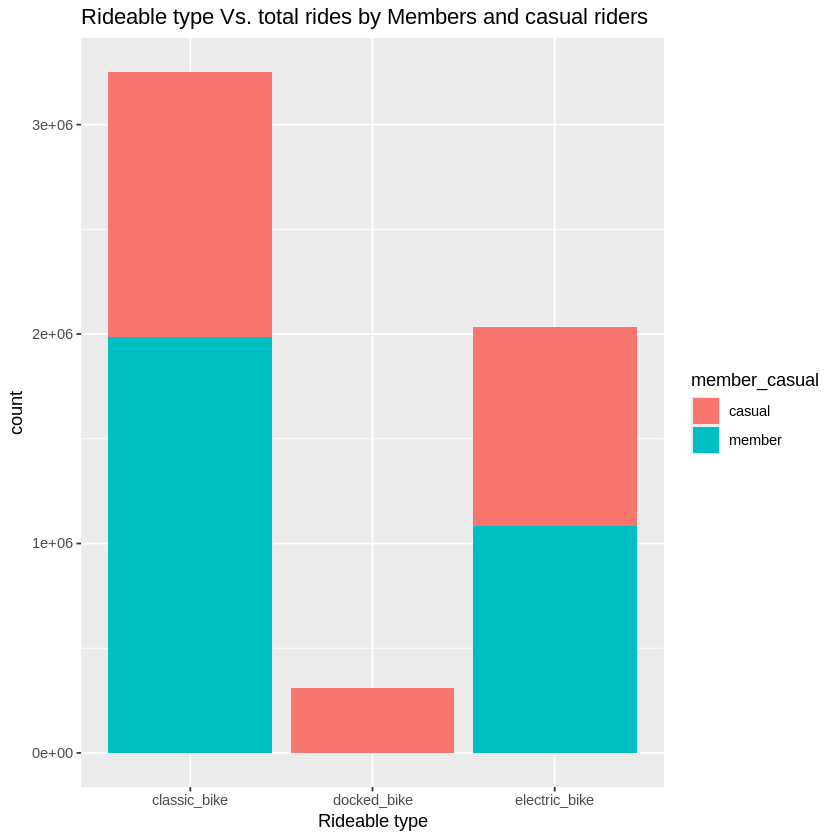

In [40]:
tripdata_clean %>%
    group_by(rideable_type) %>%
    summarise(count = length(ride_id))

ggplot(tripdata_clean, aes(x=rideable_type, fill=member_casual)) +
    labs(x="Rideable type", title="Rideable type Vs. total rides by Members and casual riders") +
    geom_bar()

* From the above viz we can see that members mostly use classic bikes, followed by electric bikes Docked bikes mostly used by casual riders. Electric bikes are more favored by members.

#### Now analyze and visualize the dataset on coordinate basis

In [41]:
#Lets check the coordinates data of the rides.
#adding a new data frame only for the most popular routes >200 rides
coordinates_df <- tripdata_clean %>%
filter(start_lng != end_lng & start_lat != end_lat) %>%
group_by(start_lng, start_lat, end_lng, end_lat, member_casual, rideable_type) %>%
summarise(total_rides = n(),.groups="drop") %>%
filter(total_rides > 200)

# now lets create two different data frames depending on rider type (member_casual)

casual_riders <- coordinates_df %>% filter(member_casual == "casual")
member_riders <- coordinates_df %>% filter(member_casual == "member")


ℹ © Stadia Maps © Stamen Design © OpenMapTiles © OpenStreetMap contributors.



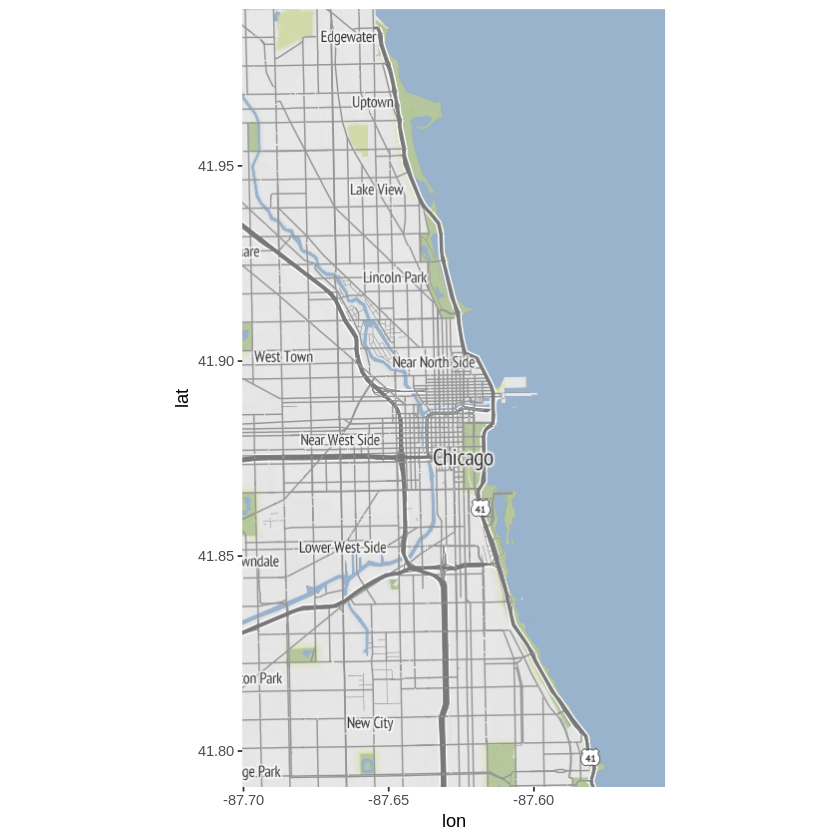

In [56]:
register_stadiamaps(key = "40a4e8af-ff22-4de2-be40-b14220070cf6")
chicago <- c(left = -87.700424, bottom = 41.790769, right = -87.554855, top = 41.990119)

chicago_map <- get_stadiamap(bbox = chicago, zoom = 12, maptype = "stamen_terrain")

ggmap(chicago_map)

#### Visualization on the map

Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Warning message:
“Removed 12 rows containing missing values or values outside the scale range
(`geom_point()`).”
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Warning message:
“Removed 53 rows containing missing values or values outside the scale range
(`geom_point()`).”


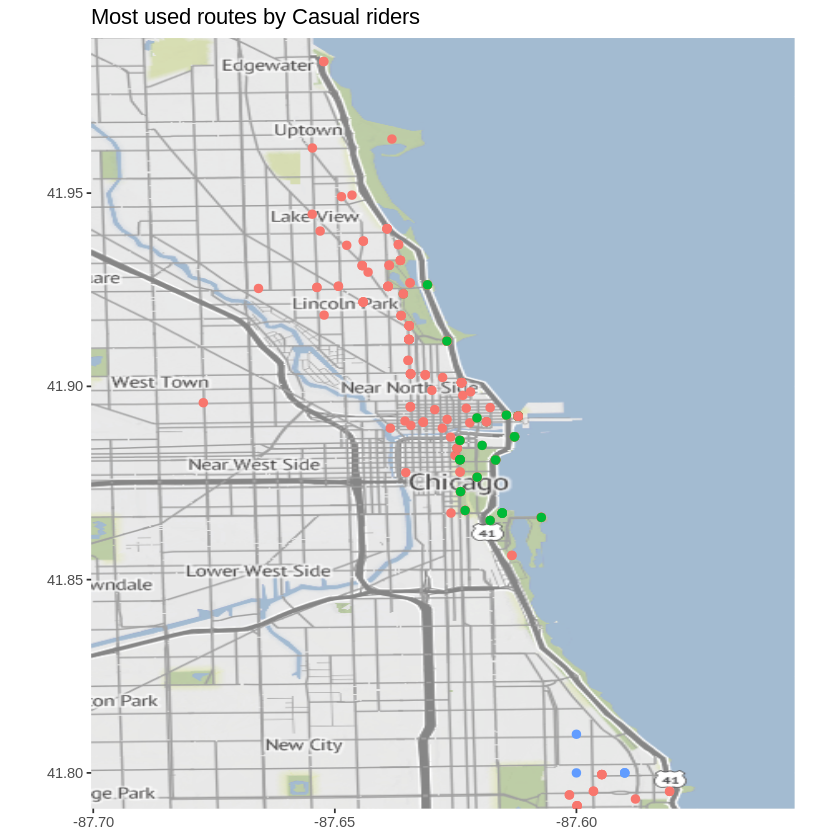

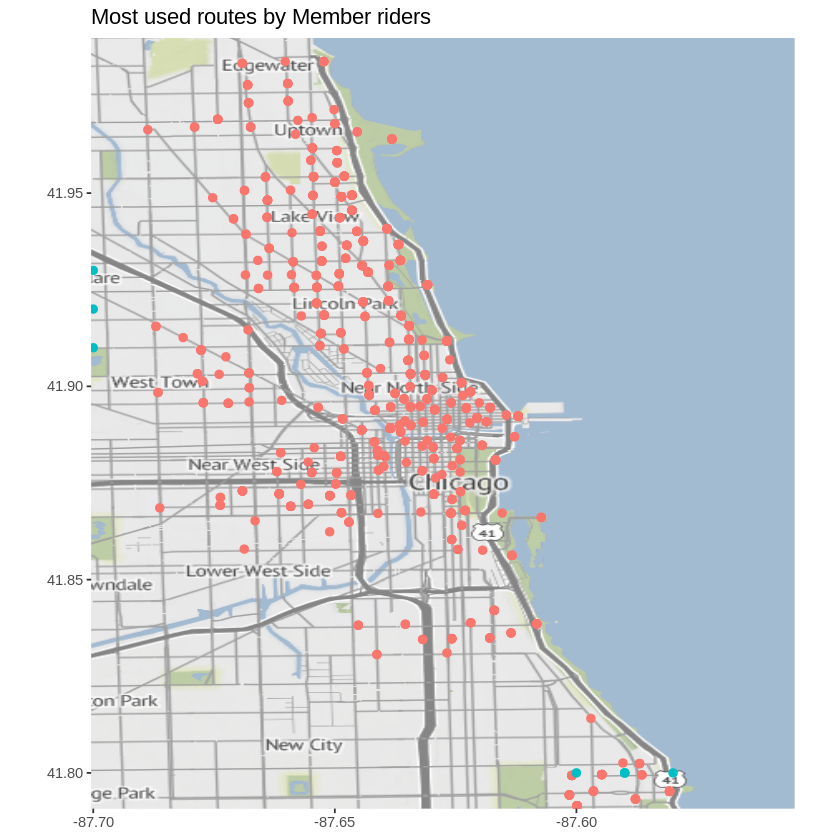

In [57]:
# maps on casual riders
ggmap(chicago_map,darken = c(0.1, "white")) +
   geom_point(casual_riders, mapping = aes(x = start_lng, y = start_lat, color=rideable_type), size = 2) +
   coord_fixed(0.8) +
   labs(title = "Most used routes by Casual riders",x=NULL,y=NULL) +
   theme(legend.position="none")

#map on member riders
ggmap(chicago_map,darken = c(0.1, "white")) +
    geom_point(member_riders, mapping = aes(x = start_lng, y = start_lat, color=rideable_type), size = 2) +
    coord_fixed(0.8) +
    labs(title = "Most used routes by Member riders",x=NULL,y=NULL) +
    theme(legend.position="none")


 * We can clearly see the casual rides are mostly located around the center of the town (or the bay area), with all their trips located around that area points towards their bike usage pattern, which is for leisure, probably tourist or sightseeing related rides.

 * Members are mostly use bike all over the city including main city area and outside main center. This can be hypothesize as they travel for work purpose.

## Share

This phase will be done by presentation, but here on [Kaggle](www.kaggle.com) we can use Notebooks to share our analysis and visualizations.

#### Key tasks

-  Determine the best way to share your findings.
-  Create effective data visualizations.
-  Present your findings.
-  Ensure your work is accessible.

#### Deliverable

-  Supporting visualizations and key findings

#### Main insights and finding conclusions

* Members holds the biggest proportion of the total rides, ~10% bigger than casuals riders.
* In all months we have more members than casual riders.
* For casual riders the biggest volume of data is on the the weekend.
* There is a bigger volume of bikers in the afternoon.

This could be possible that member use bikes for work purpose, this information can be backed by their bike usage in colder months, where there is significant drop in casual members in those months.

#### **Now for how members differs from casuals:**

* Members have the bigger volume of data, except on saturday and sunday. On the weekend, casuals riders have the most data points.
* Casuals riders have more ride length (ride duration) than members. Average ride time of member are mostly same slight increase in end of week.
* We have more members during the morning, mainly between 7am and 10am. And more casuals between 3pm and 12am.
* Members have a bigger preference for classic bikes, followed by electric bike.
* Members have a more fixed use for bikes for routine activities. Where as casual rider's usage is different, mostly all activiy in the weekend.
* Casual member spend time near the center of the city or the bay area, where as member are scattered throughout the city.

## Act

Act phase will be done by the Cyclistic's executive team, Director of Marketing (Lily Moreno), Marketing Analytics team on the basis of my analysis. (Data-driven decision making)

#### Deliverable

-  Your top three recommendations based on your analysis

    * Offer a weekend-only membership at a different price point than the full annual membership.

    * Coupons and discounts could be handed out along with the annual subscription / weekend-only membership for the usage of electric bikes targeting casual riders. Also increasing the number of electric bike while reducing classic bikes if electric bike costs more for the pass, this can be beneficial for the company. (As electric bike are already in trend and usage is good as per member and ride type data.

    * Create marketing campaigns which can be sent via email, or advertisement in the docking stations explaining why annual member is beneficial. Campaigns should be placed at the peak months of the year.

***Note : All ride ids are unique so we cannot conclude if the same rider taken several rides. More rider data needed for further analysis***

Additonal data that could expand scope of analysis

* Pricing details for members and casual riders - Based on this data, we might be to optimize cost structure for casual riders or provide discounts without affecting the profit margin.
* Address/ neighborhood details of members to investigate if there are any location specific parameters that encourage membership.
* Way to determine a recurring bike user using payment information or any personal identification.


#### Resources

* [RDocumentation](https://www.rdocumentation.org/).
* [RStudio](https://community.rstudio.com/) and [Kaggle](https://www.kaggle.com/discussion) community.

